In [1]:
 from structools import *

ModuleNotFoundError: No module named 'structools'

In [3]:
from Bio.PDB import PDBParser
from Bio.PDB.ResidueDepth import ResidueDepth
import os
import matplotlib.pyplot as plt


In [4]:
# Ruta al archivo PDB
pdb_file = "1a8o.pdb"
pdb_path = os.path.abspath(pdb_file)


In [5]:
# Ruta al ejecutable msms
msms_path = "/usr/local/bin/msms"

# Parsear estructura
parser = PDBParser(QUIET=True)
structure = parser.get_structure("1A8O", pdb_path)
model = structure[0]



In [6]:
# Calcular profundidad (forma mínima y correcta)
rd = ResidueDepth(model)

In [7]:
for chain in model:
    for residue in chain:
        if residue.id[0] == " ":  # solo residuos estándar
            key = (chain.id, residue.id)
            if key in rd:
                depth = rd[key]
                # Si depth es una tupla, tomá el primer elemento
                if isinstance(depth, tuple):
                    depth_val = depth[0]
                else:
                    depth_val = depth
                print(f"{chain.id} - {residue.resname} {residue.id[1]}: profundidad = {depth_val:.2f}")
            else:
                print(f"{chain.id} - {residue.resname} {residue.id[1]}: profundidad no calculada")

A - ASP 152: profundidad = 1.77
A - ILE 153: profundidad = 3.16
A - ARG 154: profundidad = 1.88
A - GLN 155: profundidad = 2.73
A - GLY 156: profundidad = 2.30
A - PRO 157: profundidad = 2.05
A - LYS 158: profundidad = 2.00
A - GLU 159: profundidad = 1.88
A - PRO 160: profundidad = 2.71
A - PHE 161: profundidad = 5.32
A - ARG 162: profundidad = 2.39
A - ASP 163: profundidad = 2.64
A - TYR 164: profundidad = 5.20
A - VAL 165: profundidad = 3.22
A - ASP 166: profundidad = 1.84
A - ARG 167: profundidad = 2.76
A - PHE 168: profundidad = 5.15
A - TYR 169: profundidad = 2.35
A - LYS 170: profundidad = 2.49
A - THR 171: profundidad = 1.99
A - LEU 172: profundidad = 2.82
A - ARG 173: profundidad = 1.95
A - ALA 174: profundidad = 1.94
A - GLU 175: profundidad = 1.92
A - GLN 176: profundidad = 1.86
A - ALA 177: profundidad = 1.92
A - SER 178: profundidad = 2.10
A - GLN 179: profundidad = 2.12
A - GLU 180: profundidad = 2.20
A - VAL 181: profundidad = 2.42
A - LYS 182: profundidad = 3.26
A - ASN 

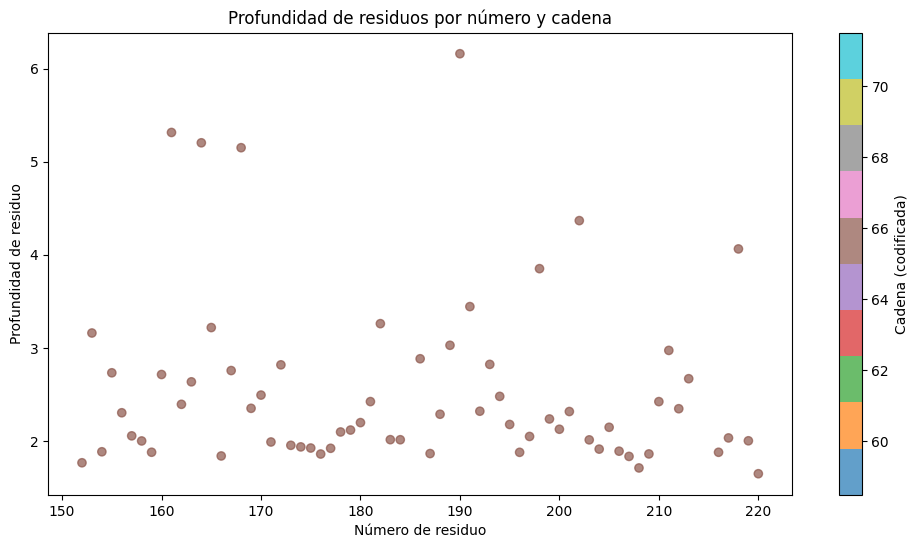

In [8]:
res_nums = []
depths = []
chains = []

for chain in model:
    for residue in chain:
        if residue.id[0] == " ":  # solo residuos estándar
            key = (chain.id, residue.id)
            if key in rd:
                depth = rd[key]
                depth_val = depth[0] if isinstance(depth, tuple) else depth
                res_nums.append(residue.id[1])
                depths.append(depth_val)
                chains.append(chain.id)

# Graficar
plt.figure(figsize=(12,6))
scatter = plt.scatter(res_nums, depths, c=[ord(c) for c in chains], cmap='tab10', alpha=0.7)
plt.xlabel("Número de residuo")
plt.ylabel("Profundidad de residuo")
plt.title("Profundidad de residuos por número y cadena")
plt.colorbar(scatter, label="Cadena (codificada)")
plt.show()